In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1_2020 = pd.read_csv('data/1. 한국전력공사_전기차 충전소 충전량(단위kWh)\한국전력공사_전기차충전소충전량(202001_202006).csv', encoding='cp949')
df2_2020 = pd.read_csv('data/1. 한국전력공사_전기차 충전소 충전량(단위kWh)\한국전력공사_전기차충전소충전량(202007_202012).csv', encoding='cp949')
df1_2021 = pd.read_csv('data/1. 한국전력공사_전기차 충전소 충전량(단위kWh)\한국전력공사_전기차충전소충전량(202101_202106).csv', encoding='cp949')
df2_2021 = pd.read_csv('data/1. 한국전력공사_전기차 충전소 충전량(단위kWh)\한국전력공사_전기차충전소충전량(202107_202112).csv', encoding='cp949')


In [181]:
# 전기차 충전소 충전량 광주광역시만 추출 및 연도별로 합치기
# 2020.01.01 ~ 2020.12.03   /   2021.01.01 ~ 2021.10.17
df1_2020 = df1_2020[df1_2020['주소'].str.contains('광주광역시', na=False)]
df2_2020 = df2_2020[df2_2020['주소'].str.contains('광주광역시', na=False)]
df1_2021 = df1_2021[df1_2021['주소'].str.contains('광주광역시', na=False)]
df2_2021 = df2_2021[df2_2021['주소'].str.contains('광주광역시', na=False)]

df_2020 = pd.concat([df1_2020, df2_2020])
df_2021 = pd.concat([df1_2021, df2_2021])

# # 년도별로 csv 파일 생성
# df_2020.to_csv("data/1. 한국전력공사_전기차 충전소 충전량(단위kWh)/광주광역시_전기차충전소충전량(2020).csv", encoding='utf-8-sig')
# df_2021.to_csv("data/1. 한국전력공사_전기차 충전소 충전량(단위kWh)/광주광역시_전기차충전소충전량(2021).csv", encoding='utf-8-sig')

In [182]:
# 충전소 위치를 '구'로 구분
df_2020['지역(구)'] = df_2020['주소'].str.split(' ').str[1]

In [183]:
# 각 '구'별 총 충전량
sum = df_2020.groupby('지역(구)')['충전량'].sum()
df_2020['지역(구)'].unique()
# sum

array(['남구', '광산구', '동구', '북구', '서구'], dtype=object)

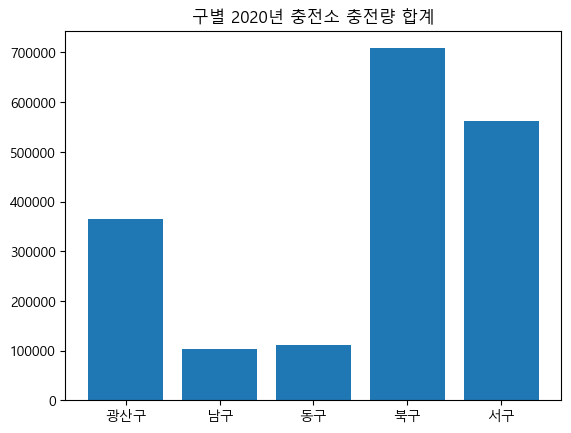

In [184]:
# plt 한글 깨짐 오류
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 구별 충선소 충전량 합계 막대그래프
plt.bar(sorted(df_2020['지역(구)'].unique()), sum)
plt.title("구별 2020년 충전소 충전량 합계")
plt.show()

In [185]:
# 주소에서 '동' 추출
df_2020['지역(동)'] = df_2020['주소'].str.split('(').str[1].str.split(',').str[0].str.replace(')','', regex=True)

In [ ]:
# 동 추출시 Nan, 금남로4가로 잘못분류된 데이터가 확인됨
df_2020['지역(동)'].unique() 

# '금남로4가'로 분류된 데이터는 모두 한곳의 장소임을 확인
df_2020[df_2020['지역(동)'] == '금남로4가']['주소'].unique()
## 주소의 동이 아닌 '금남로4가'는 '충장동'으로 변경
df_2020['지역(동)'] = df_2020['지역(동)'].replace('금남로4가', '충장동')

In [ ]:
# '동'이 Nan으로 분류된 데이터는 1472건으로 확인
df_2020['지역(동)'].isna().value_counts()
# 원인은 주소에 '동'이 적혀있지 않음
df_2020[df_2020['주소'].str.contains('\(') == False]
df_2020[df_2020['지역(동)'].isna()]


In [233]:
# '월' 열 만들기
df_2020['월'] = df_2020['충전종료일자'].str.split('-').str[1]

In [ ]:
# NaN이 아닌 이상치 데이터 확인(새로 추가한 열은 제외)
for col in df_2020.iloc[:, :-3].columns:
    value = df_2020.iloc[:, :-3][col].unique()
    print(f"{col} : {value}")